# Plotting

In this ipython notebook we plot the following

* The depth-integrated stream function
* The barotropic vorticity diagnostics
* The contour integration profile

In [212]:
import iris
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cmocean
import os
import sys

sys.path.append(os.path.abspath("../lib"))

from mpl_toolkits.axes_grid1 import make_axes_locatable

from cube_prep import CubeListExtract
from ContourInt import take_largest_contour
from cube_prep import CubeListExtract as CLE

In [213]:
data_dir = os.path.abspath("/mnt/e/GYRE_data/WindStressExpVortTrend/R4_EEN/GYRE_date_27-02-21_time_00-17-13_GYRE_T10_R4_EEN_7/OUTPUT_DEVEL2022/")

In [214]:
dpi = 100
savefig = True

# The depth-integrated stream function 

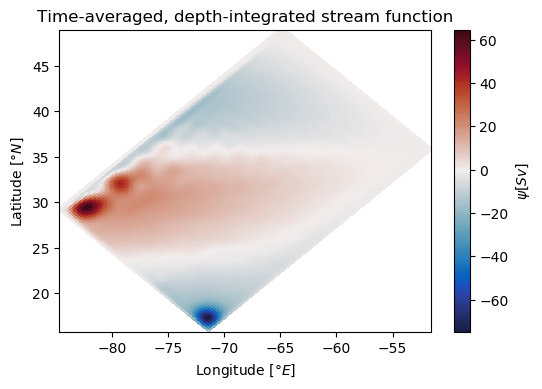

In [215]:
sf_zint_cube = iris.load(data_dir + '/sf_zint.*.nc')[0]
lon = sf_zint_cube.coord("longitude").points
lat = sf_zint_cube.coord("latitude").points

max_lon = np.max(np.ma.masked_array(lon, mask=sf_zint_cube.data.mask[-1,...]))
min_lon = np.min(np.ma.masked_array(lon, mask=sf_zint_cube.data.mask[-1,...]))
max_lat = np.max(np.ma.masked_array(lat, mask=sf_zint_cube.data.mask[-1,...]))
min_lat = np.min(np.ma.masked_array(lat, mask=sf_zint_cube.data.mask[-1,...]))

plt.figure(dpi=dpi)
plt.title(r"Time-averaged, depth-integrated stream function")
plt.xlabel(r"Longitude [$\degree E$]")
plt.ylabel(r"Latitude [$\degree N$]")
divnorm = matplotlib.colors.DivergingNorm(vcenter=0)
plt.pcolormesh(lon, lat, np.mean(sf_zint_cube.data,axis=0), norm=divnorm, cmap=cmocean.cm.balance)
# plt.gca().set_facecolor('k')
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
clb = plt.colorbar()
clb.set_label(r"$\psi [Sv]$")

# Barotropic vorticity diagnostics

In [216]:
vort_diag_list = iris.load(data_dir + '/vort_2D.*.nc')

vort_dict = {}

for cube in vort_diag_list:
    label = cube.var_name[5:-5]
    vort_dict[label] = np.mean(cube.data,axis=0)
    
lon = vort_diag_list[0].coord("longitude").points
lat = vort_diag_list[0].coord("latitude").points

max_lon = np.max(np.ma.masked_array(lon, mask=vort_diag_list[0].data.mask[-1,...]))
min_lon = np.min(np.ma.masked_array(lon, mask=vort_diag_list[0].data.mask[-1,...]))
max_lat = np.max(np.ma.masked_array(lat, mask=vort_diag_list[0].data.mask[-1,...]))
min_lat = np.min(np.ma.masked_array(lat, mask=vort_diag_list[0].data.mask[-1,...]))

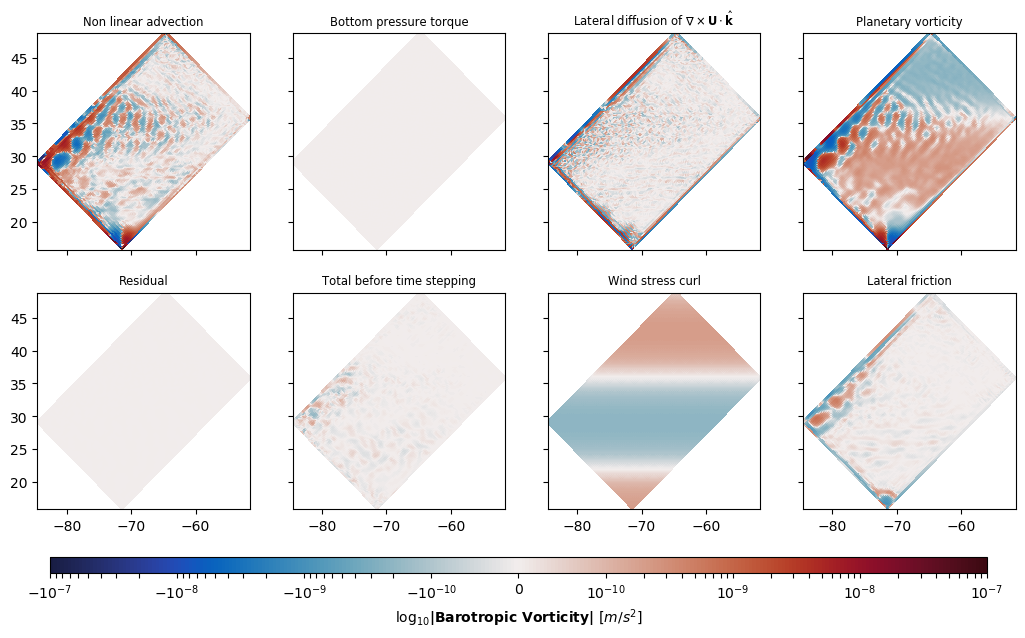

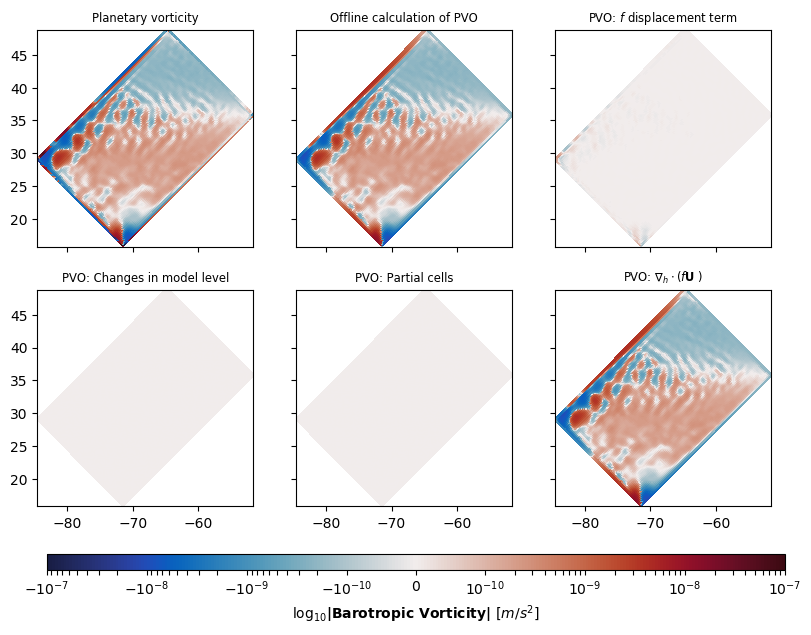

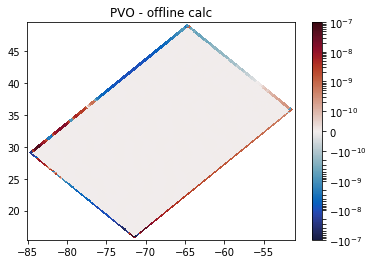

In [217]:
long_names = {'adv':"Non linear advection",
              'hpg':"Bottom pressure torque",
              'ldf':r"Lateral diffusion of $\nabla \times \mathbf{U}\cdot\hat{\mathbf{k}}$",
              'pvo': "Planetary vorticity",
              'res': "Residual",
              'tot': "Total before time stepping",
              'wnd': "Wind stress curl",
              'frc': "Lateral friction" }

long_names_PVO = {'pvo': "Planetary vorticity",
                  'pvo2': "Offline calculation of PVO",
                  'bet':"PVO: $f$ displacement term",
                  'mlv': "PVO: Changes in model level",
                  'prc': "PVO: Partial cells",
#                   'fdu':r"PVO: $f\, \nabla_h \cdot \mathbf{U}$",
                  'div':r"PVO: $\nabla_h \cdot ( f \mathbf{U}$ )" }



fig, ax = plt.subplots(2,4,dpi=dpi, figsize=(4*3.1554,2*3.1554), sharex=True, sharey=True)

i=0
j=0

# cbar_max = np.log10(np.max([np.max(np.abs(X)) for X in vort_dict.values()]))
# cbar_max = np.floor(cbar_max)

cbar_max =-7


for label in long_names:
    M = vort_dict[label]
    divnorm = matplotlib.colors.SymLogNorm(linthresh= 10**(cbar_max-3), vmin=-10**(cbar_max), vmax=10**(cbar_max))
#     divnorm = matplotlib.colors.DivergingNorm(vcenter=0)
    ax[i][j].set_title(long_names[label], fontsize='small')
    cax = ax[i][j].pcolormesh(lon, lat, M, cmap=cmocean.cm.balance, norm=divnorm, shading='goraud')
    ax[i][j].set_xlim(min_lon, max_lon)
    ax[i][j].set_ylim(min_lat, max_lat)
#     ax[i][j].set_facecolor('k')
    

    if j==3:
        j=0
        i=i+1
    else: j=j+1

ax_bounds = ax[-1,0].get_position().bounds
cbar_ax = fig.add_axes([ax_bounds[0] + 0.01, ax_bounds[1] -0.1 , 5*(ax_bounds[2] - 0.02), 0.025 ])
clb = fig.colorbar(cax, cax=cbar_ax, orientation='horizontal')
clb.set_label(r"$\log_{10}$|Barotropic Vorticity| $[m/s^2]$", fontweight='bold')     

fig, ax = plt.subplots(2,3,dpi=dpi, figsize=(3*3.1554,2*3.1554), sharex=True, sharey=True)

i=0
j=0


for label in long_names_PVO:
    M = vort_dict[label]
    divnorm = matplotlib.colors.SymLogNorm(linthresh= 10**(cbar_max-3), vmin=-10**(cbar_max), vmax=10**(cbar_max))
#     divnorm = matplotlib.colors.DivergingNorm(vcenter=0)
    ax[i][j].set_title(long_names_PVO[label], fontsize='small')
    cax = ax[i][j].pcolormesh(lon, lat, M, cmap=cmocean.cm.balance, norm=divnorm)
    ax[i][j].set_xlim(min_lon, max_lon)
    ax[i][j].set_ylim(min_lat, max_lat)
#     ax[i][j].set_facecolor('k')
    

    if j==2:
        j=0
        i=i+1
    else: j=j+1

ax_bounds = ax[-1,0].get_position().bounds
cbar_ax = fig.add_axes([ax_bounds[0] + 0.01, ax_bounds[1] -0.1 , 3.75*(ax_bounds[2] - 0.02), 0.025 ])
clb = fig.colorbar(cax, cax=cbar_ax, orientation='horizontal')
clb.set_label(r"$\log_{10}$|Barotropic Vorticity| $[m/s^2]$", fontweight='bold')    

plt.figure()
divnorm = matplotlib.colors.SymLogNorm(linthresh= 10**(cbar_max-3), vmin=-10**(cbar_max), vmax=10**(cbar_max))
plt.title(r"PVO - offline calc")
plt.pcolormesh(lon,lat,vort_dict['pvo']-vort_dict['pvo2'], norm=divnorm, cmap=cmocean.cm.balance)
plt.colorbar()

# Contour Integrals

In [218]:
#Load the Niiler integral files
NI_cube_list = iris.load(data_dir + '/NI_2D_vort.*.nc')

NI_dict = {}

In [219]:
label_list = ['ADV', 'HPG', 'LDF', 'PVO', 'RES', 'TOT', 'FRC', 'WND', 'BET', 'PRC', 'MLV', 'DIV']

for label in label_list:
    NI_dict[label] = CubeListExtract(NI_cube_list, 'Ni2D_'+label.lower(), timefix=False)

area_out = CubeListExtract(NI_cube_list, 'Ni2D_area').data
level_out = NI_dict[label_list[0]].coord('sf_zint_level').points

NI_dict_largest = {}

for label in label_list:
    NI_dict_largest[label], level_out_largest = take_largest_contour(NI_dict[label].data, level_out, area_out)
    
def splitbysign(NI_int):
    output_plus = np.zeros(NI_int.shape)
    output_neg = np.zeros(NI_int.shape)
    
    output_plus[NI_int >= 0] = NI_int[NI_int >= 0]
    output_neg[NI_int < 0] = NI_int[NI_int < 0]
    
    return output_plus, output_neg

NI_dict_plus = {}
NI_dict_minus = {}

for label in NI_dict_largest:
    NI_dict_plus[label], NI_dict_minus[label] = splitbysign(NI_dict_largest[label])


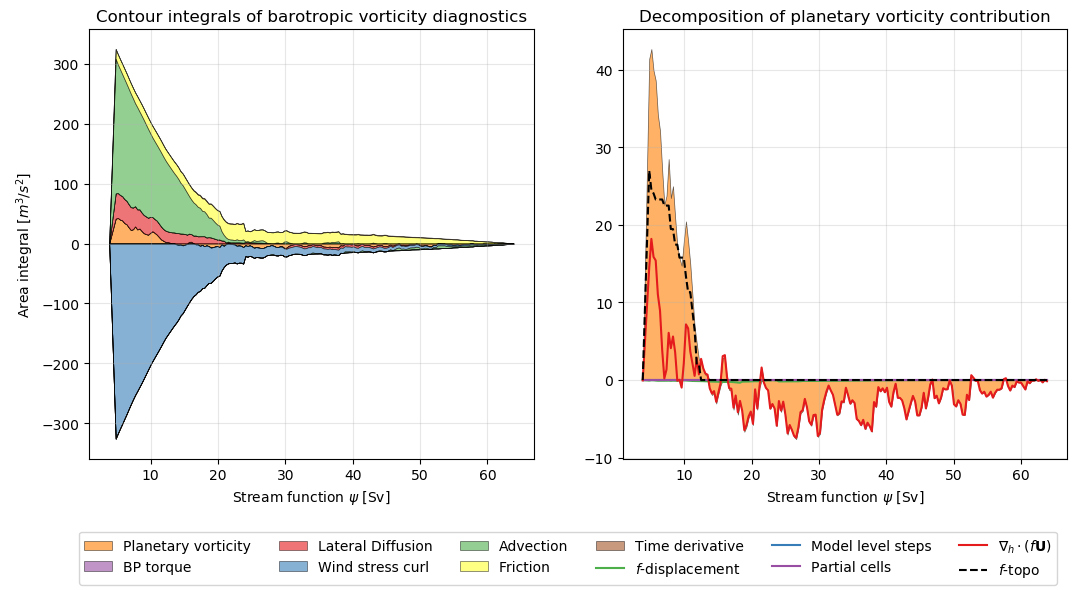

In [220]:
fig, ax = plt.subplots(1,2,figsize=(4*3.1554, 2*3.1554), dpi=dpi, sharex = True)

legend_list = ['Planetary vorticity'    , 'BP torque'    ,'Lateral Diffusion'    ,'Wind stress curl'    ,'Advection'    ,'Friction'    ,'Time derivative'    ]
color_list = ['#ff7f00','#984ea3','#e41a1c','#377eb8','#4daf4a','#ffff33','#a65628',]

plot_opts = {'alpha':0.6 , 'edgecolor':'k', 'lw':0.5, 'colors':color_list, 'labels':legend_list}

ax[0].set_title(r"Contour integrals of barotropic vorticity diagnostics")
ax[0].set_xlabel(r"Stream function $\psi$ [Sv]")
ax[0].set_ylabel(r"Area integral [$m^3/s^2$]")

ax[0].stackplot(level_out_largest,
                   np.abs(NI_dict_plus['PVO']),
                   np.abs(NI_dict_plus['HPG']),
                   np.abs(NI_dict_plus['LDF']),
                   np.abs(NI_dict_plus['WND']),
                   np.abs(NI_dict_plus['ADV']),
                   np.abs(NI_dict_plus['FRC']),
                   np.abs(NI_dict_plus['TOT']), **plot_opts)

ax[1].set_title(r"Decomposition of planetary vorticity contribution")
ax[1].set_xlabel(r"Stream function $\psi$ [Sv]")
ax[1].plot(level_out_largest, NI_dict_largest['BET'], label='$f$-displacement', color='#4daf4a')
ax[1].plot(level_out_largest, NI_dict_largest['MLV'], label='Model level steps', color='#377eb8')
ax[1].plot(level_out_largest, NI_dict_largest['PRC'], label='Partial cells', color='#984ea3')
ax[1].plot(level_out_largest, NI_dict_largest['DIV'], label=r"$\nabla_h \cdot ( f \mathbf{U} )$", color= '#e41a1c')
ax[1].plot(level_out_largest, NI_dict_largest['PVO'] - (NI_dict_largest['BET'] + NI_dict_largest['MLV'] + NI_dict_largest['PRC'] + NI_dict_largest['DIV']), label=r"$f$-topo", color='k', linestyle='dashed')

fig.subplots_adjust(bottom=0.2)
fig.legend(bbox_to_anchor=(0.45, 0.05), loc='center', ncol=6)
ax[1].stackplot(level_out_largest,
                   np.abs(NI_dict_plus['PVO']), **plot_opts)



ax[1].stackplot(level_out_largest,
                   -np.abs(NI_dict_minus['PVO']), **plot_opts)

ax[0].stackplot(level_out_largest,
                   -np.abs(NI_dict_minus['PVO']),
                   -np.abs(NI_dict_minus['HPG']),
                   -np.abs(NI_dict_minus['LDF']),
                   -np.abs(NI_dict_minus['WND']),
                   -np.abs(NI_dict_minus['ADV']),
                   -np.abs(NI_dict_minus['FRC']),
                   -np.abs(NI_dict_minus['TOT']), **plot_opts)

ax[0].grid(True, alpha=0.3)
ax[1].grid(True, alpha=0.3)

# Example contours

In [221]:
psi_list = [ 15, 20, 40]

In [222]:
contour_cube = iris.load(data_dir + '/NI_contour_masks.*.nc')[0]
contour_largest, level_out_largest_contour = take_largest_contour(contour_cube.data, level_out, area_out)

try:
    x_finegrid = contour_cube.coord("x_finegrid").points
    y_finegrid = contour_cube.coord("y_finegrid").points
except:
    print("Uninterpolated data")
    
ind_list = [int(np.where(  np.abs(level_out_largest_contour - psi) == np.min(np.abs(level_out_largest_contour - psi))  )[0]) for psi in psi_list]

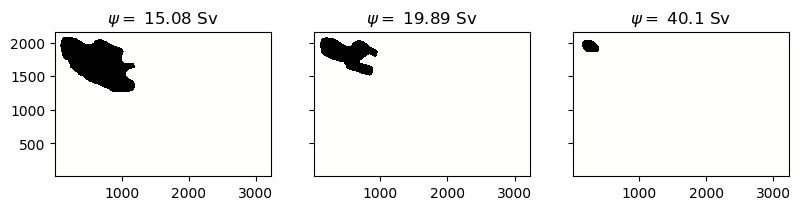

In [223]:
nfig = len(ind_list)

fig,ax = plt.subplots(1,nfig, figsize=(nfig*3.1554, 3.1554), dpi=dpi, sharex=True, sharey=True)

for i in range(nfig):
    if nfig != 1 : 
        axi = ax[i]
    else: axi = ax
        
    ind = ind_list[i]
    psi = level_out_largest[ind]
    try:
        cax = axi.pcolormesh(x_finegrid/1e3, y_finegrid/1e3, contour_largest[ind], cmap=cmocean.cm.gray)
    except:
        cax = axi.pcolormesh(lon, lat,  contour_largest[ind], cmap=cmocean.cm.gray)
    axi.set_title(r"$\psi = $ " + str(np.round(level_out_largest_contour[ind],2)) + " Sv")
    axi.set_aspect(1)